In [1]:
import sys
sys.path.append('/workspaces/ml-supervised-dev')

import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn import tree
from src.config.properties import DATA_FOLDER

In [2]:
def carrega_dados(file_path, separador=',', drop_cols=None):
    data = pd.read_csv(f"../{DATA_FOLDER}/{file_path}", sep=separador)
    data = data.sample(frac=1)
    return data if not drop_cols else data.drop(drop_cols, axis=1)

def encoding_cols(col):
    label_encoder = LabelEncoder()
    coluna_transformada = label_encoder.fit_transform(col)
    return coluna_transformada

def save_model(model, filename):
    with open(filename, 'wb') as file:
        pickle.dump(model, file)
    print("Modelo salvo")

def load_mode(filename):
    with open(filename, 'rb') as file:
        model = pickle.load(file)
    return model

def get_x_y(y_label, x_cols=None):
    X = data.drop(y_label, axis=1)
    X = X if not x_cols else X[x_cols]
    y = data[y_label]

    return X, y

#### Alguns exemplos de transformação

In [ ]:
### Filtrando o dataset
data_versicolor = data[data['Species']=='Iris-versicolor']
data_setosa = data[data['Species']=='Iris-setosa']
data_virginica = data[data['Species']=='Iris-virginica']

In [ ]:
### Transformando uma coluna
data['EVersicolor'] = data['Species'].apply(lambda x: 0 if x=="Iris-versicolor" else 1)

### Load

In [3]:
data = carrega_dados("Iris.csv", drop_cols=['Id', 'PetalLengthCm'])
X, y = get_x_y('Species')

In [4]:
data

,SepalLengthCm,SepalWidthCm,PetalWidthCm,Species
63,6.1,2.9,1.4,Iris-versicolor
132,6.4,2.8,2.2,Iris-virginica
8,4.4,2.9,0.2,Iris-setosa
81,5.5,2.4,1.0,Iris-versicolor
37,4.9,3.1,0.1,Iris-setosa
...,...,...,...,...
21,5.1,3.7,0.4,Iris-setosa
144,6.7,3.3,2.5,Iris-virginica
101,5.8,2.7,1.9,Iris-virginica
91,6.1,3.0,1.4,Iris-versicolor


### Amostragem

In [5]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

### Transformação/Pré-processamento

In [6]:
y_train = encoding_cols(y_train)
y_val = encoding_cols(y_val)

### Treinamento

In [7]:
arvore = tree.DecisionTreeClassifier()
model = arvore.fit(X_train, y_train)

### Validação

In [8]:
predicoes = model.predict(X_val)
cmatrix = confusion_matrix(y_val, predicoes) # classes reais, classes preditas pelo modelo
acuracia = accuracy_score(y_val, predicoes)
#precisao = precision_score(y_val, predicoes)
#recall = recall_score(y_val, predicoes)
print(cmatrix)
print(f"Acurácia: {acuracia}")
#print(f"Precisão: {precisao}")
#print(f"Recall: {recall}")

[[12  0  0]
 [ 0  8  0]
 [ 0  2  8]]
Acurácia: 0.9333333333333333


### Visualização da árvore

[Text(0.5416666666666666, 0.9375, 'PetalWidthCm <= 0.8\nsamples = 120\nvalue = [38, 42, 40]'),
 Text(0.4583333333333333, 0.8125, '38\n[38, 0, 0]'),
 Text(0.5, 0.875, 'True  '),
 Text(0.625, 0.8125, 'PetalWidthCm <= 1.75\n82\n[0, 42, 40]'),
 Text(0.5833333333333333, 0.875, '  False'),
 Text(0.4166666666666667, 0.6875, 'SepalLengthCm <= 7.1\n44\n[0, 41, 3]'),
 Text(0.3333333333333333, 0.5625, 'SepalLengthCm <= 4.95\n43\n[0, 41, 2]'),
 Text(0.16666666666666666, 0.4375, 'PetalWidthCm <= 1.35\n2\n[0, 1, 1]'),
 Text(0.08333333333333333, 0.3125, '1\n[0, 1, 0]'),
 Text(0.25, 0.3125, '1\n[0, 0, 1]'),
 Text(0.5, 0.4375, 'SepalWidthCm <= 2.25\n41\n[0, 40, 1]'),
 Text(0.4166666666666667, 0.3125, 'PetalWidthCm <= 1.25\n4\n[0, 3, 1]'),
 Text(0.3333333333333333, 0.1875, '2\n[0, 2, 0]'),
 Text(0.5, 0.1875, 'SepalLengthCm <= 6.1\n2\n[0, 1, 1]'),
 Text(0.4166666666666667, 0.0625, '1\n[0, 0, 1]'),
 Text(0.5833333333333334, 0.0625, '1\n[0, 1, 0]'),
 Text(0.5833333333333334, 0.3125, '37\n[0, 37, 0]'),
 Tex

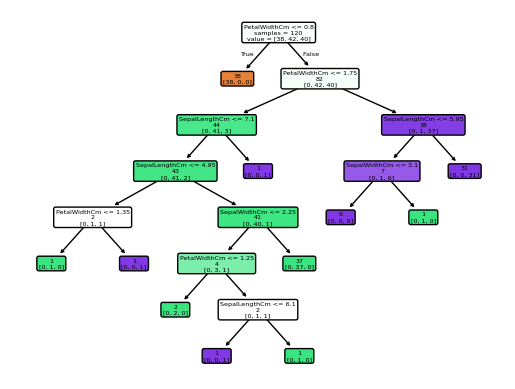

In [9]:
tree.plot_tree(arvore, feature_names=X_val.columns, label="root", impurity=False, rounded=True, filled=True)

### Salva o modelo

In [10]:
save_model(arvore, "arvore_decisao.pkl")

Modelo salvo
